# Week 3 handin

# Handin Exercise 6

Create a module containing a class: TextComparer with the following methods:
1. `__init__(self, url_list)`
2. `download(url,filename)` that stores the file on disk and raises NotFoundException when url returns 404
3. `multi_download()` uses threads to download multiple urls as text and stores filenames on a property of the TextComparer class object (Hint: use the download() method and create the filenames from the url or from the response object)
4. `__iter__()` returns an iterator
5. `__next__()` returns the next filename (and stops when there are no more)
6. `urllist_generator()` returns a generator to loop through the urls
7. `avg_vowels(text)` - a rough estimate on readability returns average number of vowels in the words of the text
8. `hardest_read()` reads all text from files in `filenames` and returns the filename of the text with the highest vowel score (use all the cpu cores on the computer for this work.

### Ex 2
Create a notebook and import your module from above
1. Find 10 books on https://www.gutenberg.org/browse/scores/top and download them using an object of the class you just created before
2. Test the different methods of your class
3. Make a bar plot with a sorted list of books on x-axis and avg vowels on y-axis

## 02 Status
Here is a status on the handin. How far you got. What is implemented and what is not

## 03 Solution part 1

In [1]:
# 2 Create a notebook and import your module from above
from modules.week6.text_comparer import TextComparer

In [2]:
# 2.1 Find 10 books
comparer = TextComparer(
    [
        "https://www.gutenberg.org/files/84/84-0.txt",
        "https://www.gutenberg.org/files/1342/1342-0.txt",
        "https://www.gutenberg.org/files/25344/25344-0.txt",
        "https://www.gutenberg.org/files/11/11-0.txt",
        "https://www.gutenberg.org/files/2701/2701-0.txt",
        "https://www.gutenberg.org/files/1952/1952-0.txt",
        "https://www.gutenberg.org/files/1661/1661-0.txt",
        "https://www.gutenberg.org/files/345/345-0.txt",
        "https://www.gutenberg.org/files/2542/2542-0.txt",
        "https://www.gutenberg.org/files/43/43-0.txt"
    ]
)

In [3]:
# 2.2 Test the different methods on your class
comparer.multi_download()

## 04 Solution part 2

In [4]:
# class iterator
iterator = iter(comparer)
try:
    [print(next(iterator)) for _ in range(0, 5)]
except StopIteration as e:
    print(type(e))

files/books/84-0.txt
files/books/1342-0.txt
files/books/25344-0.txt
files/books/11-0.txt
files/books/2701-0.txt


In [5]:
# urllist_generator
urllist = comparer.urllist_generator()
try:
    [print(next(urllist)) for _ in range(0, 5)]
except StopIteration as e:
    print(type(e))

https://www.gutenberg.org/files/84/84-0.txt
https://www.gutenberg.org/files/1342/1342-0.txt
https://www.gutenberg.org/files/25344/25344-0.txt
https://www.gutenberg.org/files/11/11-0.txt
https://www.gutenberg.org/files/2701/2701-0.txt


In [6]:
sorted_hardest_books = comparer.hardest_read()

<BarContainer object of 10 artists>

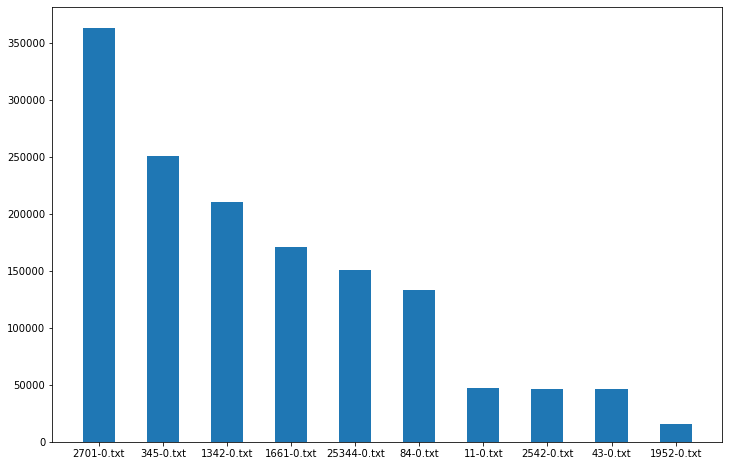

In [7]:
# Make a bar plot with a sorted list of books on x-axis and avg vowels on y-axis
import matplotlib.pyplot as plt

plt.figure(figsize= (12, 8))
plt.bar(sorted_hardest_books.keys(), sorted_hardest_books.values(), width=0.5)